In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

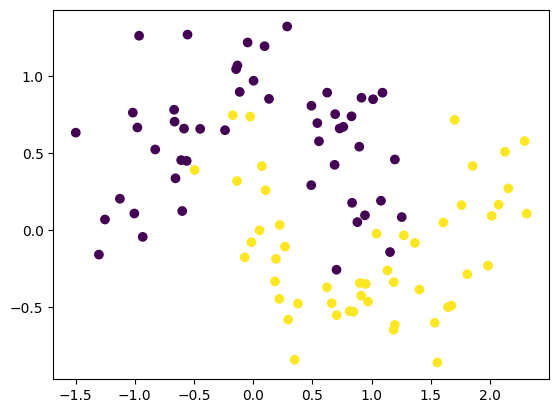

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


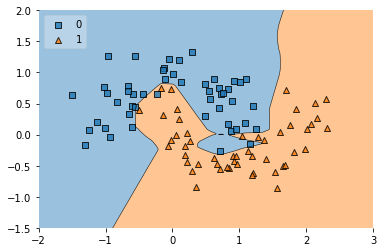

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

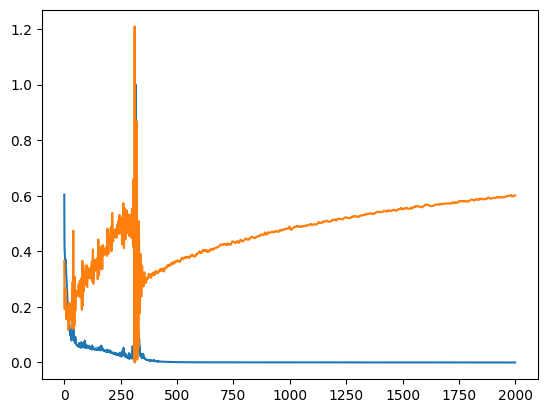

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [10]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 0.7000 - loss: 4.2184 - val_accuracy: 0.8500 - val_loss: 2.6629
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 2.4321 - val_accuracy: 0.9000 - val_loss: 1.5026
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8188 - loss: 1.4362 - val_accuracy: 0.9000 - val_loss: 0.8704
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.8775 - val_accuracy: 0.9000 - val_loss: 0.6302
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8383 - loss: 0.6834 - val_accuracy: 0.9000 - val_loss: 0.5365
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8680 - loss: 0.6056 - val_accuracy: 0.9000 - val_loss: 0.4951
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7695 - loss: 0.7074 - val_accuracy: 0.9000 - val_loss: 0.5927
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8344 - loss: 0.6495 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


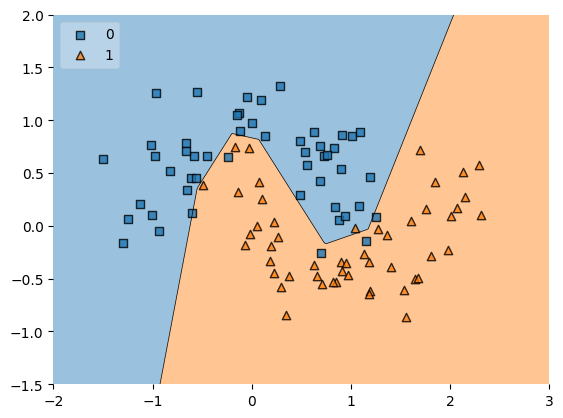

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

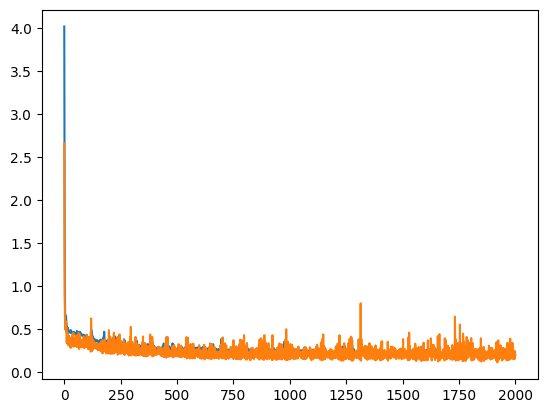

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [14]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

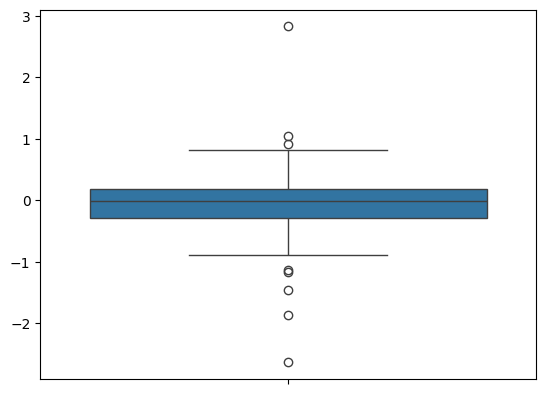

In [15]:
sns.boxplot(model1_weight_layer1)

<Axes: >

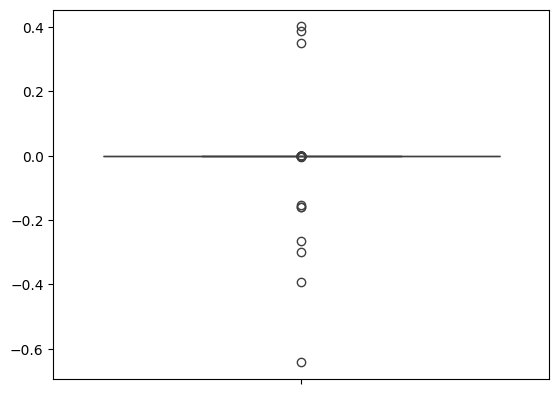

In [16]:
sns.boxplot(model2_weight_layer1)

In [21]:
print(model1_weight_layer1.min())
print(model1_weight_layer1.max())

-2.6324937
2.8303833


In [22]:
print(model2_weight_layer1.min())
print(model2_weight_layer1.max())

-0.642701
0.4017246


/tmp/ipython-input-2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
/tmp/ipython-input-2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

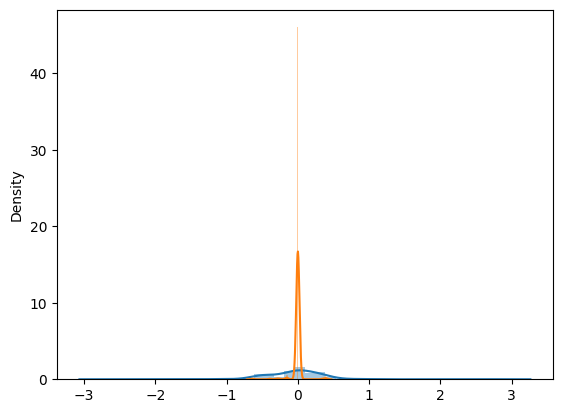

In [23]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [24]:
model1.get_weights()[0].reshape(256)

array([-3.63791347e-01,  9.05129015e-02, -6.53892457e-02,  1.22477926e-01,
        4.27408278e-01, -1.76395074e-01, -5.38823485e-01,  2.29360968e-01,
        7.46509582e-02,  2.13259887e-02, -1.77278504e-01,  3.12957257e-01,
       -4.63067919e-01, -4.69681591e-01,  1.55220717e-01, -3.32988113e-01,
       -5.72698534e-01, -6.22072490e-03, -3.96424830e-02, -1.64689139e-01,
        3.42175692e-01, -4.94693756e-01, -3.75316478e-02, -6.64421916e-01,
       -5.85809052e-01,  1.48147896e-01, -5.05379260e-01,  3.25204760e-01,
        4.48586136e-01, -5.46053588e-01, -4.70012546e-01, -3.53624783e-02,
        2.73961335e-01,  1.97676256e-01, -3.48444790e-01,  1.96322482e-02,
       -2.90633708e-01,  3.04766595e-01,  8.11199844e-02,  2.96594799e-01,
        9.49991867e-02,  2.98163921e-01, -1.46625757e-01, -5.33234417e-01,
        2.03426734e-01, -1.96049914e-01,  3.73845160e-01,  4.24617290e-01,
       -3.49091470e-01,  3.31467569e-01, -1.36955306e-01, -4.66551334e-01,
       -5.39902508e-01,  